In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


**Sigmoid Function**
The sigmoid function is defined as:

1 / (1 + e^-z)

*   It converts the linear output (z) into a probability value
between 0 and 1.
*   Logistic regression uses this function to predict class probabilities.

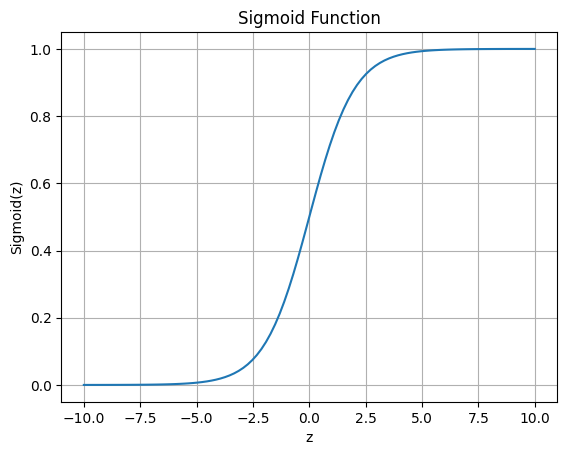

In [12]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()


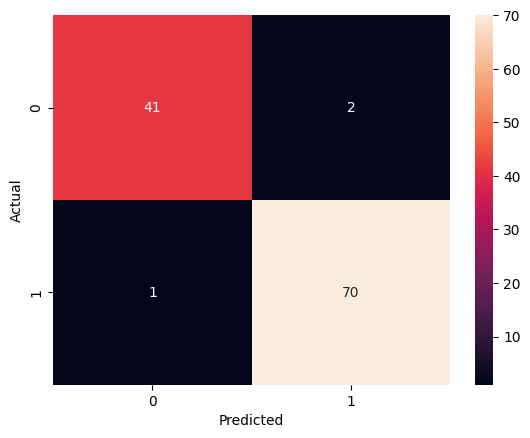

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



ROC-AUC: 0.99737962659679


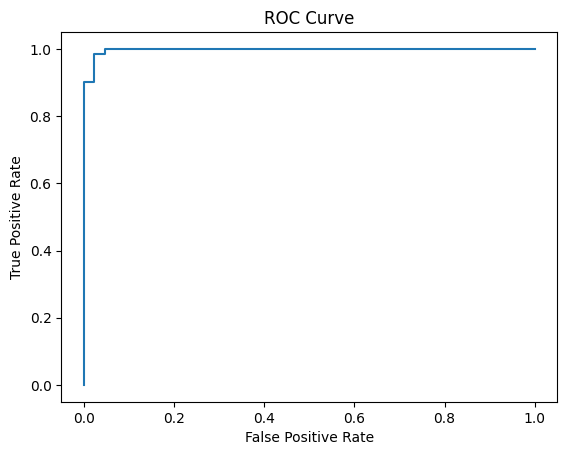

In [10]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [13]:
custom_pred = (y_prob > 0.6).astype(int)
print(confusion_matrix(y_test, custom_pred))


[[42  1]
 [ 1 70]]


**Conclsion**

The logistic regression model performs well in classifying malignant and benign tumors. The ROC-AUC score indicates strong discriminative ability between the two classes.